# Matplotlib = 여러개의 그래프

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

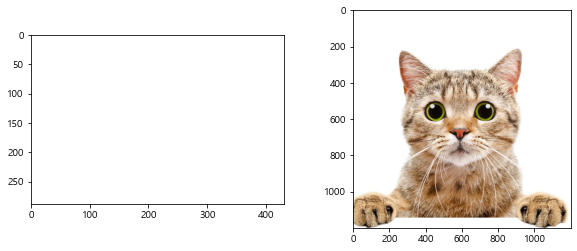

In [5]:
from PIL import Image
img1 = Image.open('삼각함수.png')
img2 = Image.open('cat.jpg')

plt.figure(figsize=(10,4))
plt.subplot(121), plt.imshow(img1)
plt.subplot(1,2,2), plt.imshow(img2)
plt.show()